In [20]:
library(GWmodel)
library(dplyr)
library(rgdal)
library(tmap)

rgdal: version: 1.5-18, (SVN revision 1082)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.0, released 2020/10/26
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 6.3.1, February 10th, 2020, [PJ_VERSION: 631]
Path to PROJ shared files: /usr/share/proj
Linking to sp version:1.4-4
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



In [2]:
house.price <- read.csv("house_price_coord.csv") %>%
  filter(housing_use == 1 & floor != "NONE" & lon > 114.1 & lon < 114.5)
house.price$building_type <- factor(house.price$building_type)
house.price$building_structure <- factor(house.price$building_structure)
house.price$decoration_situation <- factor(house.price$decoration_situation)
house.price$transaction_ownership <- factor(house.price$transaction_ownership)
house.price$structure_type <- factor(house.price$structure_type)
house.price$floor <- factor(house.price$floor)
house.price$price <- log(house.price$price)
house.price$charge <- log(house.price$charge)
house.price$building_area <- log(house.price$building_area)
house.price$d_busines4 <- log(house.price$d_busines4 + 1)
house.price$d_green <- log(house.price$d_green + 1)
house.price$d_waterthree <- log(house.price$d_waterthree + 1)
house.price$d_waternew <- log(house.price$d_waternew + 1)
house.price$d_waterselected <- log(house.price$d_waterselected + 1)
house.price$d_high <- log(house.price$d_high)
house.price$d_middle <- log(house.price$d_middle)
house.price$d_subwayonly <- log(house.price$d_subwayonly)
house.price$d_supermarket <- log(house.price$d_asupermarket)
house.price$d_kindergarden <- log(house.price$d_akindergarden)
house.price$d_commonmall <- log(house.price$d_acommonmall)
house.price$d_university <- log(house.price$d_auniversity)
house.price$d_primaryschool <- log(house.price$d_aprimaryschool)
house.price$d_shoppingmall <- log(house.price$d_ashoppingmall)
head(house.price)

,X,id,lon,lat,price,group,building_area,building_type,building_structure,decoration_situation,⋯,d_acommonmall,d_akindergarden,d_asupermarket,group_count,d_supermarket,d_kindergarden,d_commonmall,d_university,d_primaryschool,d_shoppingmall
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,104101066680,114.31,30.5233,9.948652,0,4.443474,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
2,1,104101127856,114.31,30.5233,9.964630,0,3.688379,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
3,2,104100890629,114.31,30.5233,9.920984,0,4.476768,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
4,3,104101117479,114.31,30.5233,9.980958,0,4.742843,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
5,4,104101202944,114.31,30.5233,9.904037,0,3.688379,塔楼,钢混结构,精装,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265
6,5,104100740242,114.31,30.5233,10.001249,0,3.708927,塔楼,钢混结构,其他,⋯,0.005164052,0.001446042,0.001854652,44,-6.290058,-6.538925,-5.266034,-4.633394,-5.711257,-5.20265


In [5]:
house.price.dummy <- house.price
dummy_vars = c("building_type", "building_structure", "decoration_situation", "transaction_ownership", "structure_type", "floor")
for (varn in dummy_vars) {
  value_range <- unique(house.price.dummy[,varn])
  for (value_name in value_range) {
    value_var_name <- paste(varn, value_name, sep = "")
    house.price.dummy[,value_var_name] <- 0
    house.price.dummy[which(house.price.dummy[,varn] == value_name), value_var_name] = 1
  }
}
coordinates(house.price.dummy) <- ~lon + lat

# GWR 分析

In [70]:
### 参数设置
house.gwr.cfg <- list(
    kernel = "gaussian",
    adaptive = "adaptive"
)

In [8]:
house.gwr.formula <- price ~ d_waterthree + d_busines4 + charge + d_aprimaryschool + d_akindergarden + building_area + floor高楼层
house.gwr.bw <- bw.gwr(house.gwr.formula, data = house.price.dummy, longlat = T, 
                       kernel = house.gwr.cfg$kernel, adaptive = house.gwr.cfg$adaptive == "adaptive", 
                       parallel.method = "omp")
house.gwr <- gwr.basic(house.gwr.formula, data = house.price.dummy, longlat = T, bw = house.gwr.bw, 
                       kernel = house.gwr.cfg$kernel, adaptive = house.gwr.cfg$adaptive == "adaptive", 
                       parallel.method = "omp")
house.gwr

Take a cup of tea and have a break, it will take a few minutes.
          -----A kind suggestion from GWmodel development group
Adaptive bandwidth: 12124 CV score: 551.6587 
Adaptive bandwidth: 7501 CV score: 526.774 
Adaptive bandwidth: 4643 CV score: 499.3987 
Adaptive bandwidth: 2877 CV score: 470.1288 
Adaptive bandwidth: 1785 CV score: 433.2618 
Adaptive bandwidth: 1111 CV score: 394.9407 
Adaptive bandwidth: 693 CV score: 361.5673 
Adaptive bandwidth: 436 CV score: 330.9614 
Adaptive bandwidth: 276 CV score: 295.3429 
Adaptive bandwidth: 178 CV score: 248.8504 
Adaptive bandwidth: 116 CV score: NaN 
Adaptive bandwidth: 214 CV score: 268.3333 
Adaptive bandwidth: 153 CV score: NaN 
Adaptive bandwidth: 191 CV score: 256.7396 
Adaptive bandwidth: 167 CV score: NaN 
Adaptive bandwidth: 181 CV score: 250.6554 
Adaptive bandwidth: 172 CV score: 394.2886 
Adaptive bandwidth: 177 CV score: 248.5223 
Adaptive bandwidth: 181 CV score: 250.6554 
Adaptive bandwidth: 178 CV score: 248.8504 
A

   ***********************************************************************
   *                       Package   GWmodel                             *
   ***********************************************************************
   Program starts at: 2021-06-01 16:19:11 
   Call:
   gwr.basic(formula = house.gwr.formula, data = house.price.dummy, 
    bw = house.gwr.bw, kernel = "gaussian", adaptive = T, longlat = T, 
    parallel.method = "omp")

   Dependent (y) variable:  price
   Independent variables:  d_waterthree d_busines4 charge d_aprimaryschool d_akindergarden building_area floor高楼层
   Number of data points: 19605
   ***********************************************************************
   *                    Results of Global Regression                     *
   ***********************************************************************

   Call:
    lm(formula = formula, data = data)

   Residuals:
     Min       1Q   Median       3Q      Max 
-0.69945 -0.11795 -0.01483  0.10032  

# 制图

In [22]:
### 导入底图
wuhan <- readOGR("Map/WuhanDistinct.shp")

OGR data source with driver: ESRI Shapefile 
Source: "/home/hpdell/文档/House-HLM-GWR/Map/WuhanDistinct.shp", layer: "WuhanDistinct"
with 13 features
It has 6 fields
Integer64 fields read as strings:  FID_市界 FID_Wuhan 


In [41]:
### 基本图层
house.figure.base <- tm_layout(legend.outside = F, legend.position = c(0, 0), legend.frame = "white", outer.margins = 0, frame = FALSE) +
    tm_shape(wuhan) + tm_borders("black", lwd = 1) +
    tm_compass(position = c(0, 1), just = c(0, 1)) +
    tm_scale_bar(position = c(1, 0), just = c(1, 0))

## 回归系数

In [15]:
### 生成制图数据
house.price.draw <- aggregate(
      cbind(lon, lat, Intercept, d_waterthree, d_busines4, charge, d_aprimaryschool, d_akindergarden, building_area, floor高楼层) ~ group,
      data = cbind(group = house.price.dummy$group, house.gwr$SDF@coords, house.gwr$SDF@data),
      FUN = mean
)
coordinates(house.price.draw) <- ~ lon + lat
proj4string(house.price.draw) <- CRS("+proj=longlat +datum=WGS84")
names(house.price.draw@data) <- c("Group", "Intercept", "d.Water", "d.Commercial", "Fee", 
                                  "d.PrimarySchool", "d.Kindergarten", "BuildingArea", "Floor.High")
head(house.price.draw@data)

,Group,Intercept,d.Water,d.Commercial,Fee,d.PrimarySchool,d.Kindergarten,BuildingArea,Floor.High
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9.836800,14.072005,22.7836816,0.08224418,16.878376,-37.356492,-0.048768659,-0.013290955
2,1,10.012444,34.637650,0.1970576,-0.07136181,-4.954695,-38.872762,-0.195655421,-0.005325131
3,2,9.853004,1.425732,-1.4918098,0.11901750,-10.015330,-4.503547,0.004967945,0.004731312
4,4,10.378492,21.343884,10.3552505,0.03491135,2.867729,-30.818537,-0.325145041,-0.016150245
5,6,10.250940,-9.701952,91.2397066,0.11633347,-3.522466,-9.937137,-0.007184881,0.010280317
6,9,10.138295,26.799774,14.8079385,0.04190759,1.839765,-39.285881,-0.323100395,0.005310921


Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


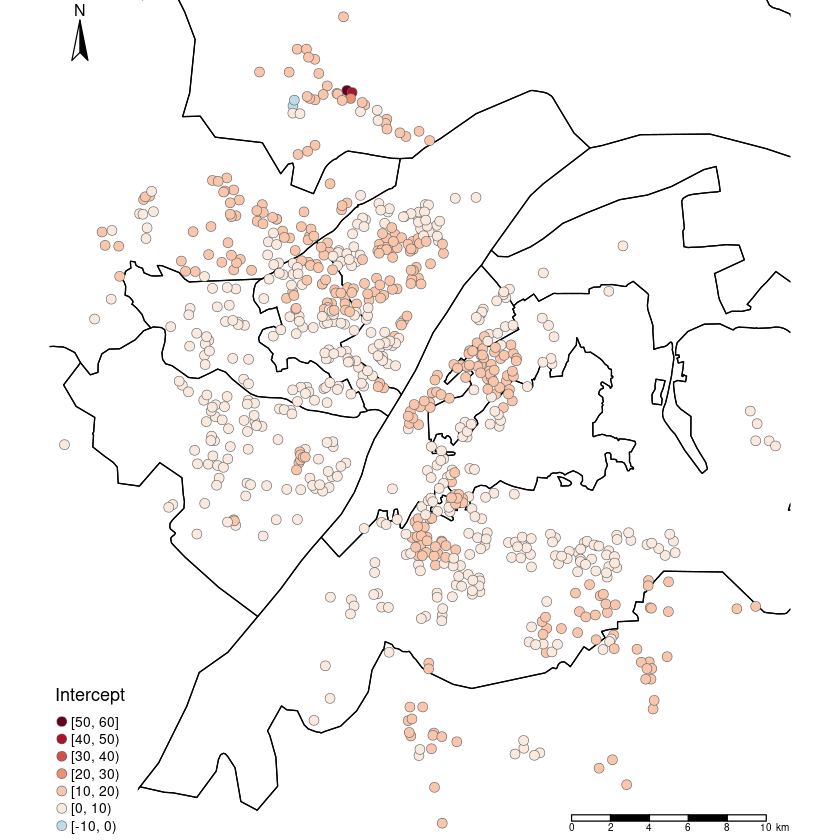

In [61]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Intercept", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"), style = "pretty")

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


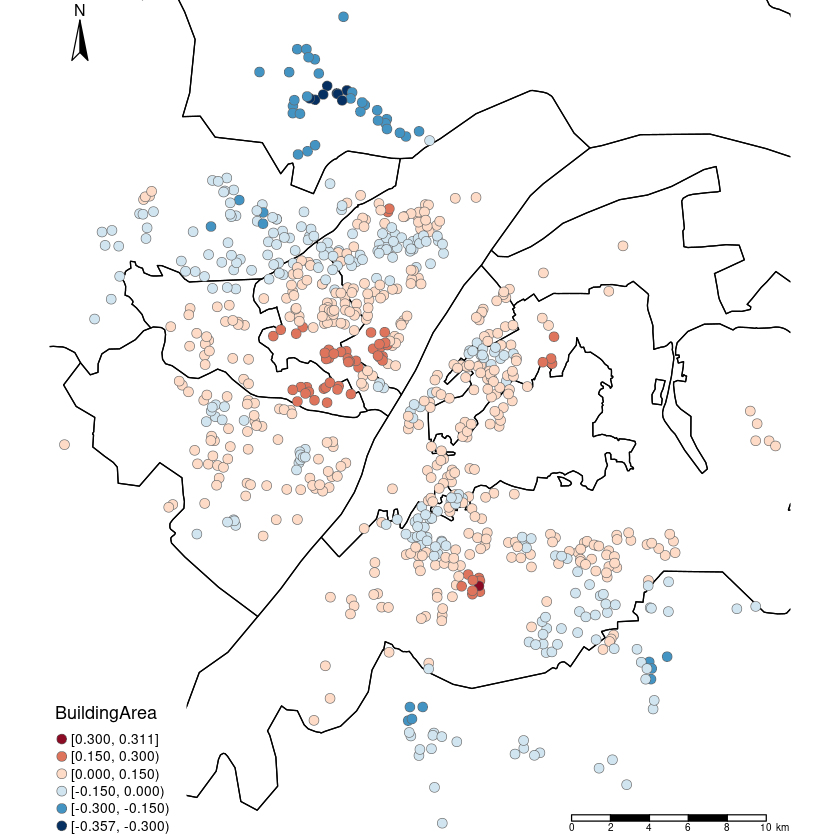

In [46]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "BuildingArea", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(BuildingArea), seq(-0.3, 0.3, by = 0.15), max(BuildingArea))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


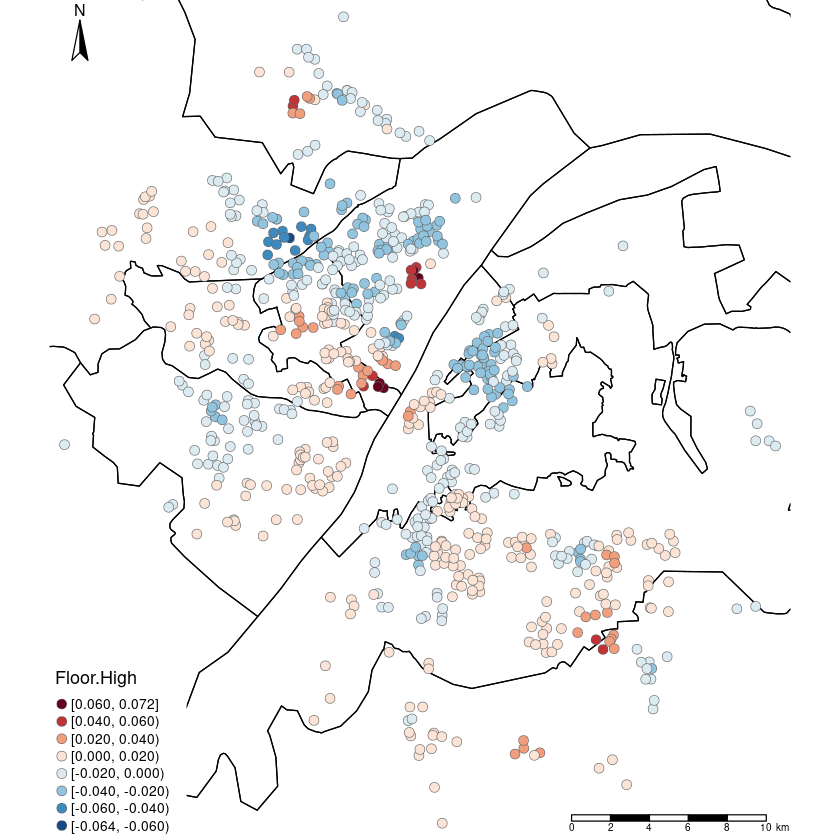

In [52]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Floor.High", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Floor.High), seq(-0.06, 0.06, by = 0.02), max(Floor.High))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


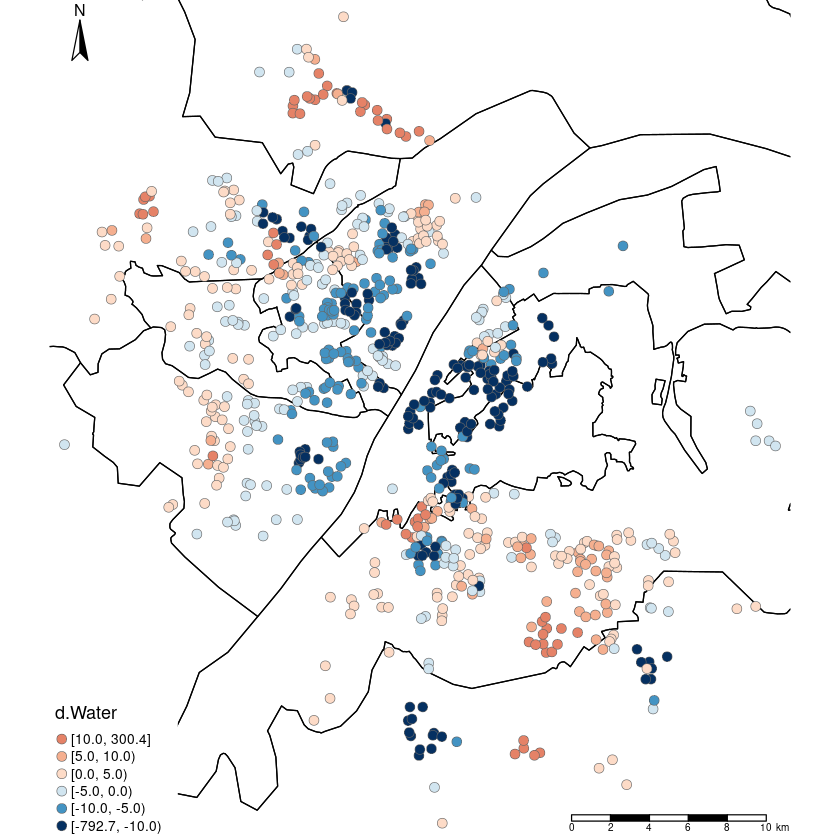

In [53]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.Water", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Water), seq(-10, 10, by = 5), max(d.Water))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


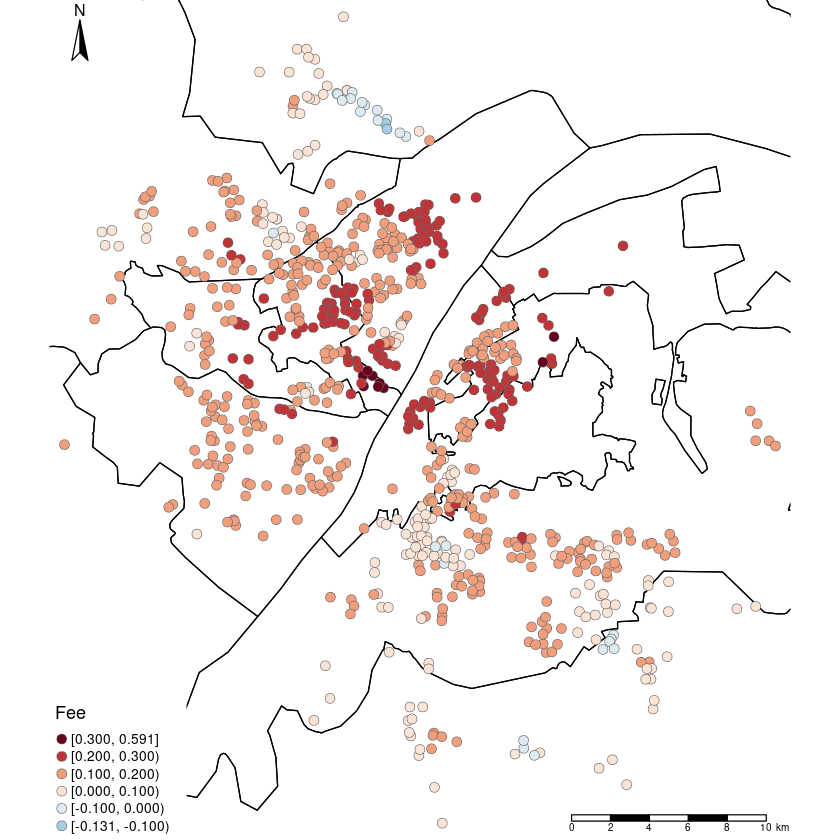

In [77]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "Fee", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(Fee), seq(-0.1, 0.3, by = 0.1), max(Fee))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


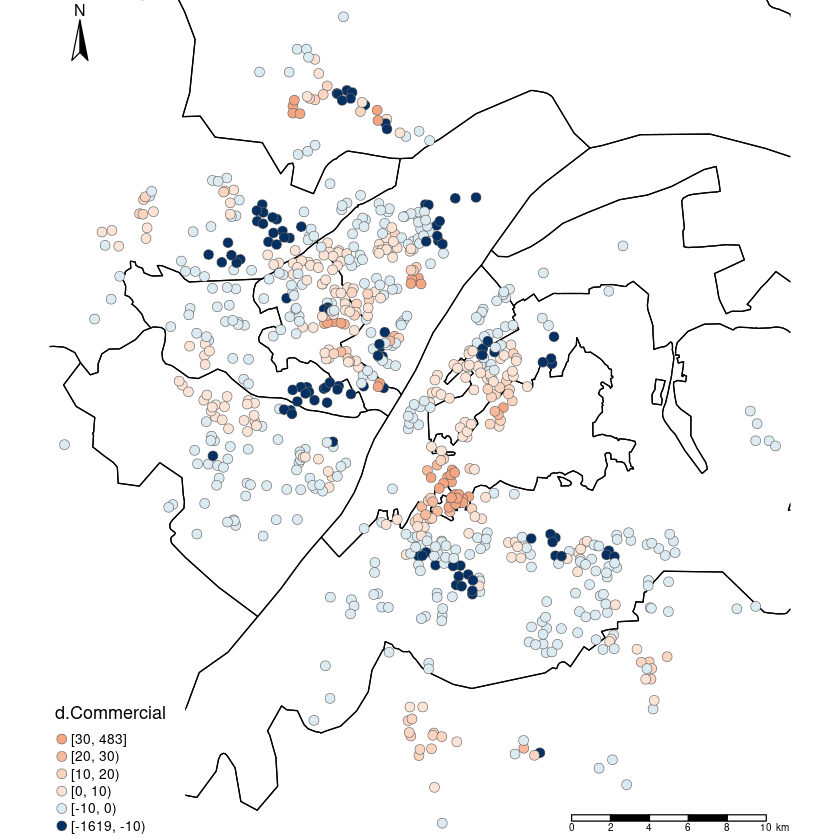

In [55]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.Commercial", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Commercial), seq(-10, 30, by = 10), max(d.Commercial))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


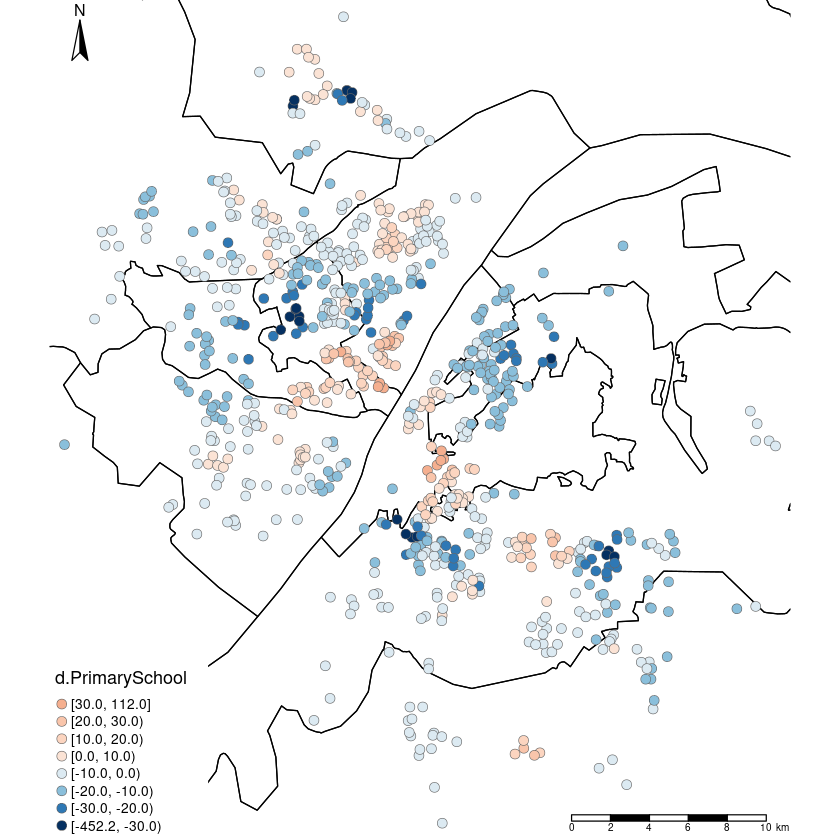

In [56]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.PrimarySchool", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.PrimarySchool), seq(-30, 30, by = 10), max(d.PrimarySchool))))

Warning message in sp::proj4string(obj):
“CRS object has comment, which is lost in output”


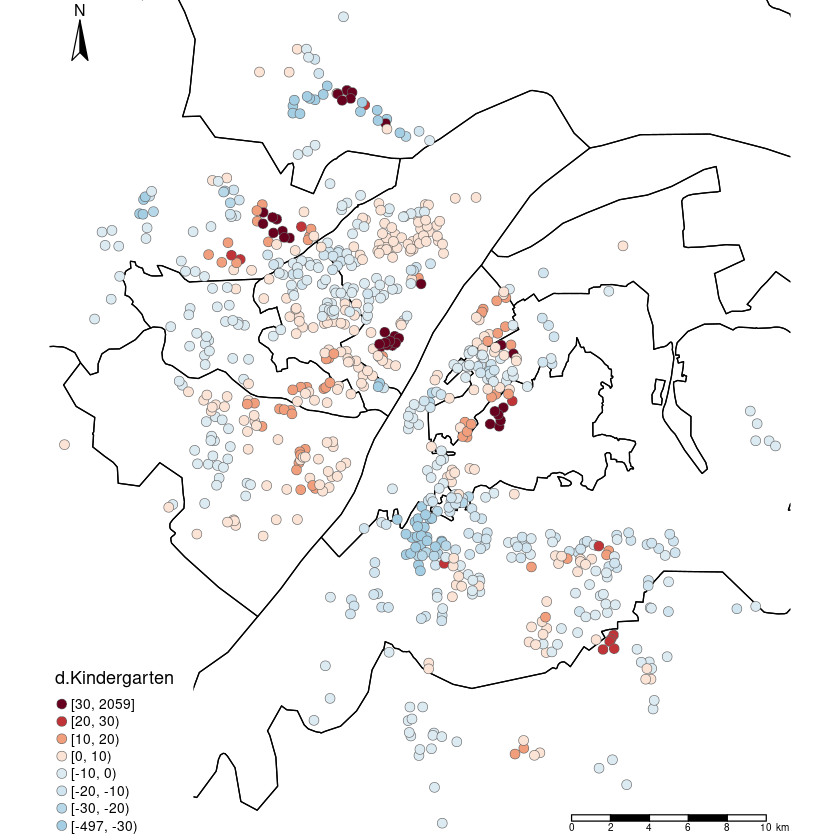

In [57]:
house.figure.base + tm_shape(house.price.draw, is.master = T) + 
    tm_symbols(col = "d.Kindergarten", size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
               legend.col.reverse = T, legend.format = list(scientific = T, format = "f"),
               style = "fixed", breaks = with(house.price.draw@data, c(min(d.Kindergarten), seq(-30, 30, by = 10), max(d.Kindergarten))))

In [78]:
figure.coef.configures <- list(
    "Intercept" = list(style = "pretty", breaks = c()), 
    "BuildingArea" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(BuildingArea), seq(-0.3, 0.3, by = 0.15), max(BuildingArea)))), 
    "d.Water" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.Water), seq(-10, 10, by = 5), max(d.Water)))), 
    "Fee" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(Fee), seq(-0.1, 0.3, by = 0.1), max(Fee)))), 
    "d.Commercial" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.Commercial), seq(-10, 30, by = 10), max(d.Commercial)))), 
    "d.PrimarySchool" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.PrimarySchool), seq(-30, 30, by = 10), max(d.PrimarySchool)))), 
    "d.Kindergarten" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(d.Kindergarten), seq(-30, 30, by = 10), max(d.Kindergarten)))), 
    "Floor.High" = list(style = "fixed", breaks = with(house.price.draw@data, c(min(Floor.High), seq(-0.06, 0.06, by = 0.02), max(Floor.High))))
)

In [1]:
figure.coef.names <- c("Intercept", "d.Water", "Fee", "d.Commercial", "d.PrimarySchool", 
                       "d.Kindergarten", "BuildingArea", "Floor.High")
for (figure.coef.current in figure.coef.names) {
    figure.coef.plot <- house.figure.base + tm_shape(house.price.draw, is.master = T) + 
        tm_symbols(col = figure.coef.current, size = 0.3, palette = "-RdBu", n = 7, contrast = c(0, 1), midpoint = 0, border.lwd = 0.5, 
                   legend.col.reverse = T, legend.format = list(scientific = T, format = "f"), stretch.palette = FALSE, 
                   style = figure.coef.configures[[figure.coef.current]]$style, breaks = figure.coef.configures[[figure.coef.current]]$breaks)
    tmap_save(figure.coef.plot, sprintf("Figure/GWR/GWR-coef-%s-%s-%s.png", house.gwr.cfg$kernel, house.gwr.cfg$adaptive, figure.coef.current), width = 6, height = 6.2, family = "serif")
}

ERROR: Error in eval(expr, envir, enclos): 找不到对象'house.figure.base'


## 残差

In [17]:
### 生成残差数据
house.price.draw.resudial <- as.data.frame(cbind(
    group = house.price.draw$Group,
    residual.mean = aggregate(residual ~ group, data = cbind(group = house.price.dummy$group, house.gwr$SDF@data), FUN = mean)$residual,
    residual.vars = aggregate(residual ~ group, data = cbind(group = house.price.dummy$group, house.gwr$SDF@data), FUN = var)$residual,
    house.price.draw@coords
))
coordinates(house.price.draw.resudial) <- ~ lon + lat
proj4string(house.price.draw.resudial) <- CRS("+proj=longlat +datum=WGS84")
head(house.price.draw.resudial@data)

,group,residual.mean,residual.vars
,<dbl>,<dbl>,<dbl>
1,0,-0.045606405,0.004272557
2,1,0.015571223,0.002915327
3,2,-0.002056969,0.005362728
4,4,-0.072065305,0.012657719
5,6,-0.313467474,0.048432328
6,9,0.006892091,0.007131494
